<a href="https://colab.research.google.com/github/marievrablic-dat-a-girl/marievrablic-dat-a-girl.github.io/blob/master/Southern_Water_Corp_Python_Vrablic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20, 5)

In [ ]:
dataframe_raw = pd.read_csv('DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv')

In [ ]:
print(dataframe_raw.describe())
print(dataframe_raw.info())

       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.298203     0.579055         6.651633   
min       

In [ ]:
print(dataframe_stdev.describe())
print(dataframe_stdev.info())

       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2452.000000              2452.000000       2452.000000   
mean                  1.485126                 1.497361          6.648308   
std                   2.294950                 2.282053          5.722897   
min                   0.380000                 0.640000          0.580000   
25%                   1.070000                 1.080000          5.520000   
50%                   1.160000                 1.170000          5.990000   
75%                   1.230000                 1.260000          6.460000   
max                  21.390000                21.530000         59.310000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2452.000000          2452.000000   2452.00000      2452.000000   
mean      13.945338             3.436370      0.37060         2.725232   
std       12.394302             3.043042      0.29979         4.186723   
min       

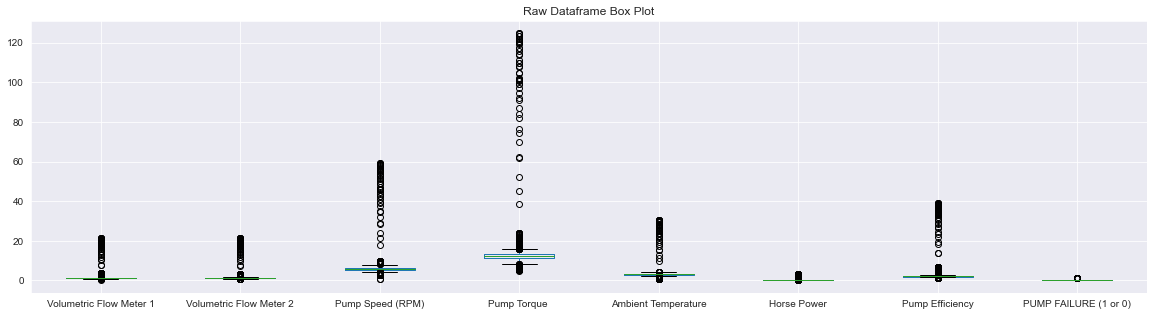

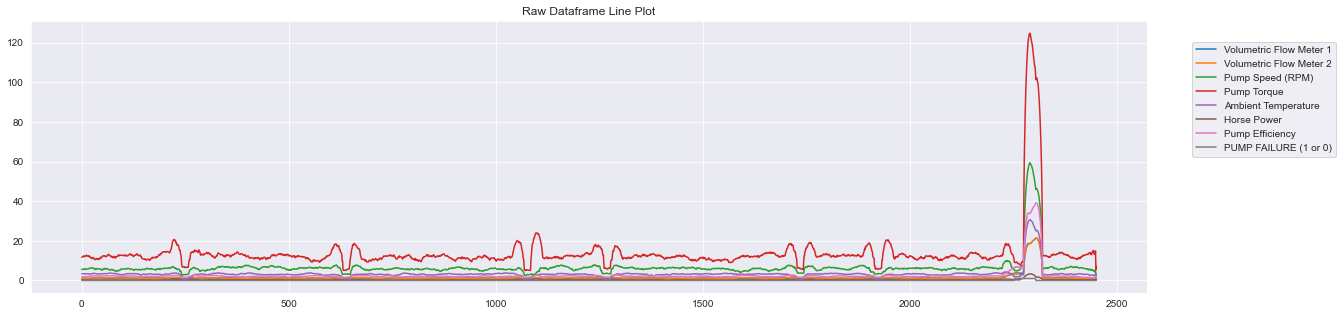

In [ ]:
dataframe_raw = pd.read_csv('DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv')
dataframe_stdev.plot(kind='box', title='Raw Dataframe Box Plot')
plt.show()
dataframe_stdev.plot(kind='line', title='Raw Dataframe Line Plot')
plt.legend(loc=(1.04,0.5))
plt.show()

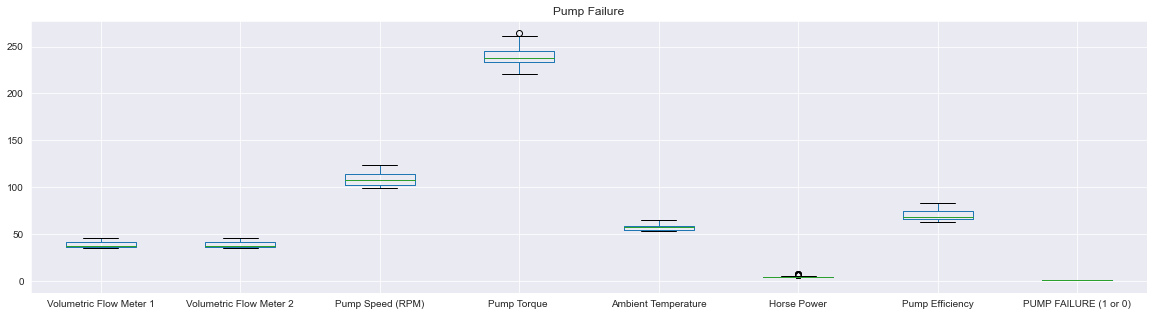

In [ ]:
Pump_Failure = dataframe_raw['PUMP FAILURE (1 or 0)']==1
dataframe_raw_Pump_Failure = dataframe_raw[Pump_Failure]
dataframe_raw_Pump_Failure.plot(kind='box')
plt.title("Pump Failure")
plt.show()

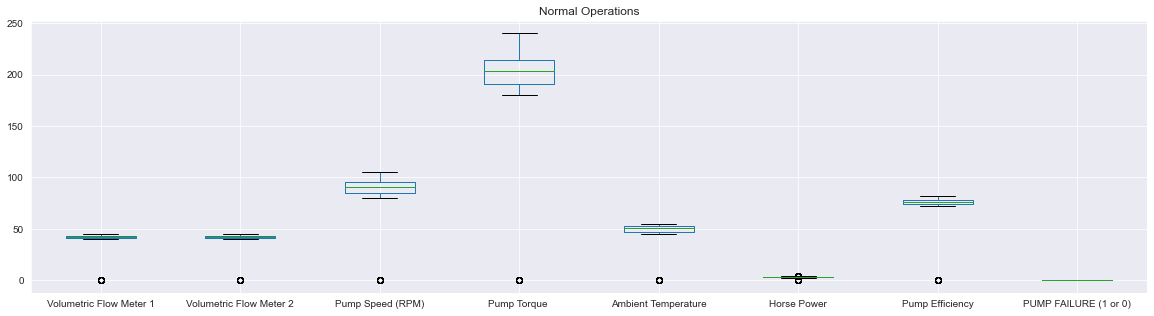

In [ ]:
Pre_Failure = dataframe_raw['PUMP FAILURE (1 or 0)']==0
dataframe_raw_Pre_Failure = dataframe_raw[Pre_Failure]
dataframe_raw_Pre_Failure.plot(kind='box')
plt.title("Normal Operations")
plt.show()

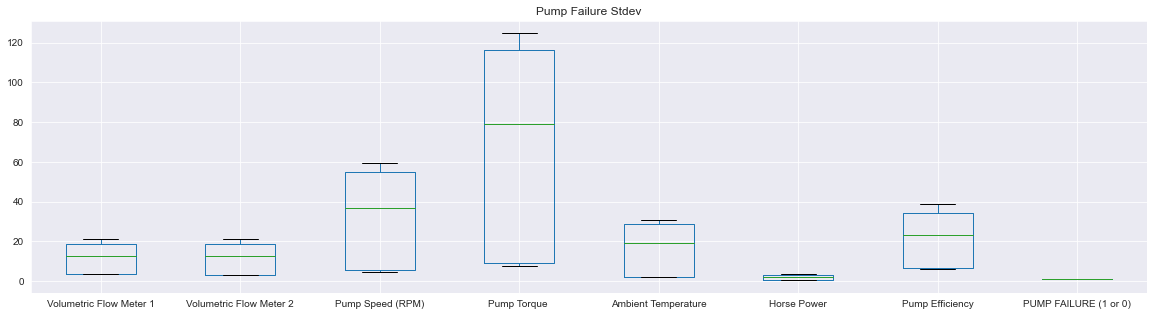

In [ ]:
Pump_Failure_stdev = dataframe_stdev['PUMP FAILURE (1 or 0)']==1
dataframe_stdev_Pump_Failure_stdev = dataframe_stdev[Pump_Failure_stdev]
dataframe_stdev_Pump_Failure_stdev.plot(kind='box')
plt.title("Pump Failure Stdev")
plt.show()

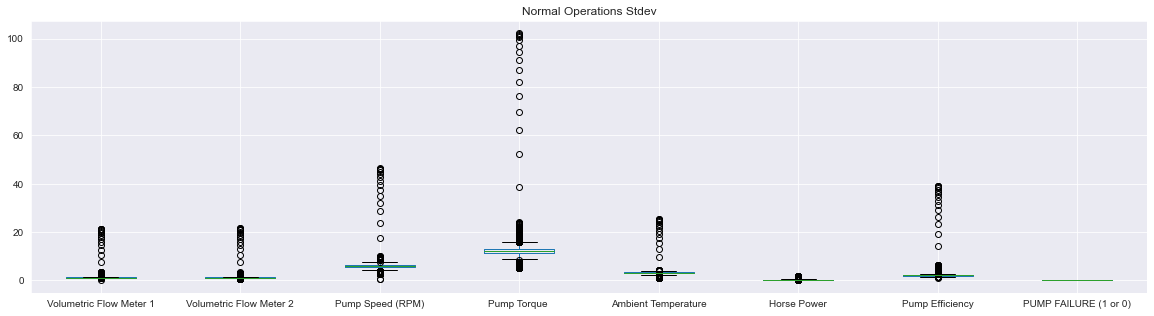

In [ ]:
Pre_Failure_stdev = dataframe_stdev['PUMP FAILURE (1 or 0)']==0
dataframe_stdev_Pre_Failure_stdev = dataframe_stdev[Pre_Failure_stdev]
dataframe_stdev_Pre_Failure_stdev.plot(kind='box')
plt.title("Normal Operations Stdev")
plt.show()

In [ ]:
Q1 = dataframe_raw.quantile(.25)
Q1

Volumetric Flow Meter 1     41.05
Volumetric Flow Meter 2     41.00
Pump Speed (RPM)            85.00
Pump Torque                191.00
Ambient Temperature         48.00
Horse Power                  3.22
Pump Efficiency             74.56
PUMP FAILURE (1 or 0)        0.00
Name: 0.25, dtype: float64

In [ ]:
Q3 = dataframe_raw.quantile(.75)
Q3

Volumetric Flow Meter 1     43.14
Volumetric Flow Meter 2     43.13
Pump Speed (RPM)            97.00
Pump Torque                215.00
Ambient Temperature         53.00
Horse Power                  3.78
Pump Efficiency             78.47
PUMP FAILURE (1 or 0)        0.00
Name: 0.75, dtype: float64

In [ ]:
IQR = Q3 - Q1
print(IQR)

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


In [ ]:
Lower_Limit = Q1 - 1.5 * IQR

In [ ]:
Upper_Limit = Q3 + 1.5 * IQR

In [ ]:
Outliers = dataframe_raw[((dataframe_raw < Lower_Limit)|((dataframe_raw > Upper_Limit))).any(axis=1)]


<ipython-input-16-686877ab9b91>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Outliers = dataframe_raw[((dataframe_raw < Lower_Limit)|((dataframe_raw > Upper_Limit))).any(axis=1)]
<ipython-input-16-686877ab9b91>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Outliers = dataframe_raw[((dataframe_raw < Lower_Limit)|((dataframe_raw > Upper_Limit))).any(axis=1)]


In [ ]:
Outliers

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
248,Raw,9/12/2014 4:08,44.61,42.28,103,240,54,4.71,81.11,0
267,Raw,9/12/2014 4:27,43.02,44.53,102,238,53,4.62,78.22,0
272,Raw,9/12/2014 4:32,43.37,42.30,104,238,52,4.71,78.85,0
641,Raw,9/12/2014 10:41,42.50,43.12,105,234,52,4.68,77.27,0
655,Raw,9/12/2014 10:55,42.90,43.26,104,236,53,4.67,78.00,0
...,...,...,...,...,...,...,...,...,...,...
2316,Raw,10/12/2014 14:36,0.00,0.00,0,0,0,0.00,0.00,0
2317,Raw,10/12/2014 14:37,0.00,0.00,0,0,0,0.00,0.00,0
2318,Raw,10/12/2014 14:38,0.00,0.00,0,0,0,0.00,0.00,0
2319,Raw,10/12/2014 14:39,0.00,0.00,0,0,0,0.00,0.00,0


In [ ]:
no_outliers = dataframe_raw[~((dataframe_raw < Lower_Limit)|((dataframe_raw > Upper_Limit))).any(axis=1)]

<ipython-input-18-1cfacafd97d8>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outliers = dataframe_raw[~((dataframe_raw < Lower_Limit)|((dataframe_raw > Upper_Limit))).any(axis=1)]
<ipython-input-18-1cfacafd97d8>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outliers = dataframe_raw[~((dataframe_raw < Lower_Limit)|((dataframe_raw > Upper_Limit))).any(axis=1)]


In [ ]:
no_outliers

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Raw,9/12/2014 0:00,41.30,41.16,98,207,54,3.86,74.84,0
1,Raw,9/12/2014 0:01,42.40,41.39,92,212,46,3.71,75.25,0
2,Raw,9/12/2014 0:02,41.43,41.15,80,207,55,3.15,74.82,0
3,Raw,9/12/2014 0:03,42.21,40.93,83,190,49,3.00,74.42,0
4,Raw,9/12/2014 0:04,40.51,43.32,90,195,50,3.34,78.76,0
...,...,...,...,...,...,...,...,...,...,...
2448,Raw,10/12/2014 16:48,40.75,41.61,87,183,48,3.03,75.65,0
2449,Raw,10/12/2014 16:49,41.32,42.34,100,213,48,4.06,76.98,0
2450,Raw,10/12/2014 16:50,40.53,40.68,89,182,51,3.08,73.96,0
2451,Raw,10/12/2014 16:51,43.82,42.87,89,181,49,3.07,77.95,0


In [ ]:
condition_1 = no_outliers['PUMP FAILURE (1 or 0)']==1
no_outliers_Failure = no_outliers[condition_1]
no_outliers_Failure.plot(kind='box')
plt.title("Pump Failure")
plt.show

NameError: ignored

<function matplotlib.pyplot.show(close=None, block=None)>

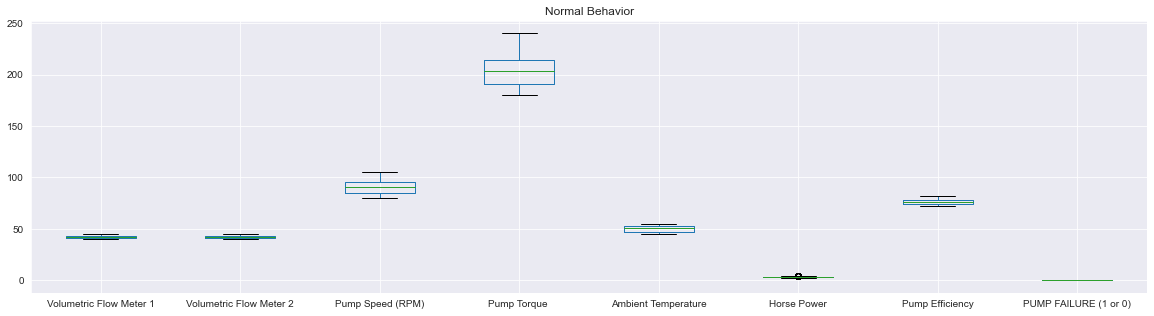

In [ ]:
condition_2 = no_outliers['PUMP FAILURE (1 or 0)']==0
no_outliers_Normal = no_outliers[condition_2]
no_outliers_Normal.plot(kind='box')
plt.title("Normal Behavior")
plt.show

In [ ]:
ListOfVariables = dataframe_raw.drop(['PUMP FAILURE (1 or 0)', 'Data Source', 'TIMEFRAME (DD/MM/YYYY)'], axis=1).columns

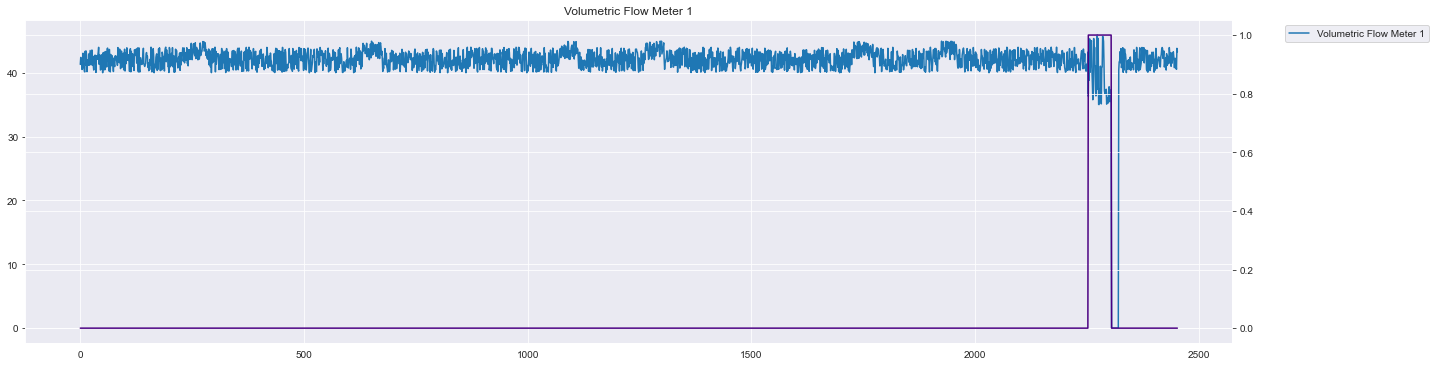

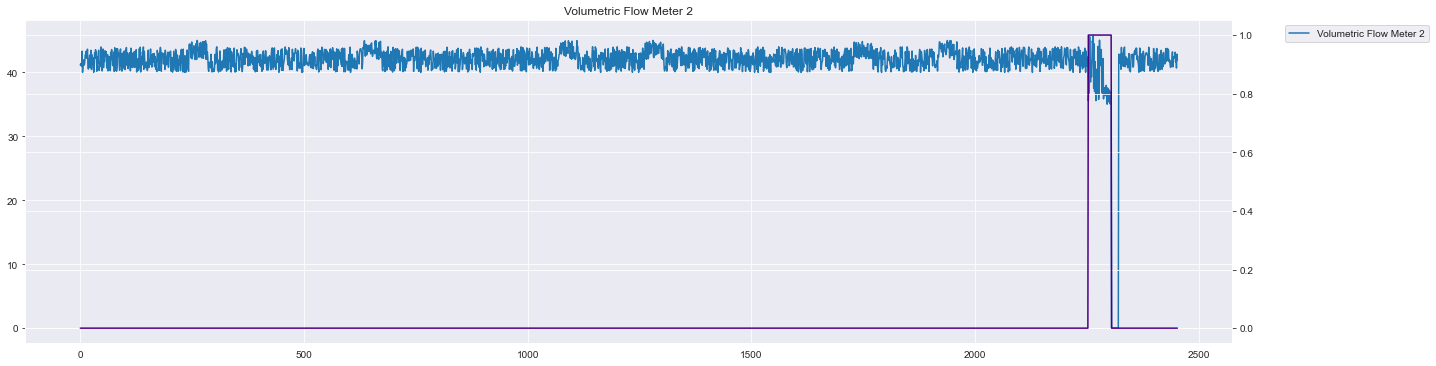

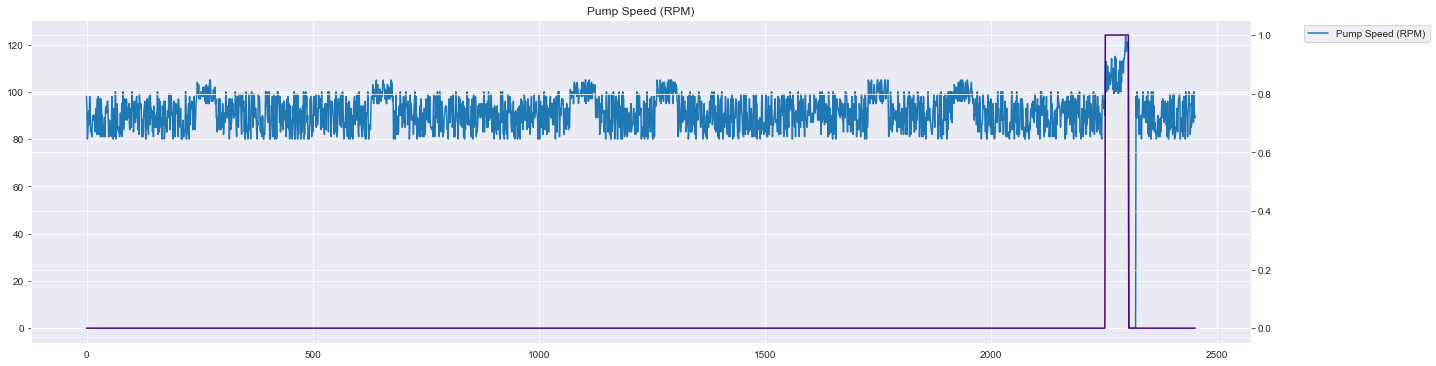

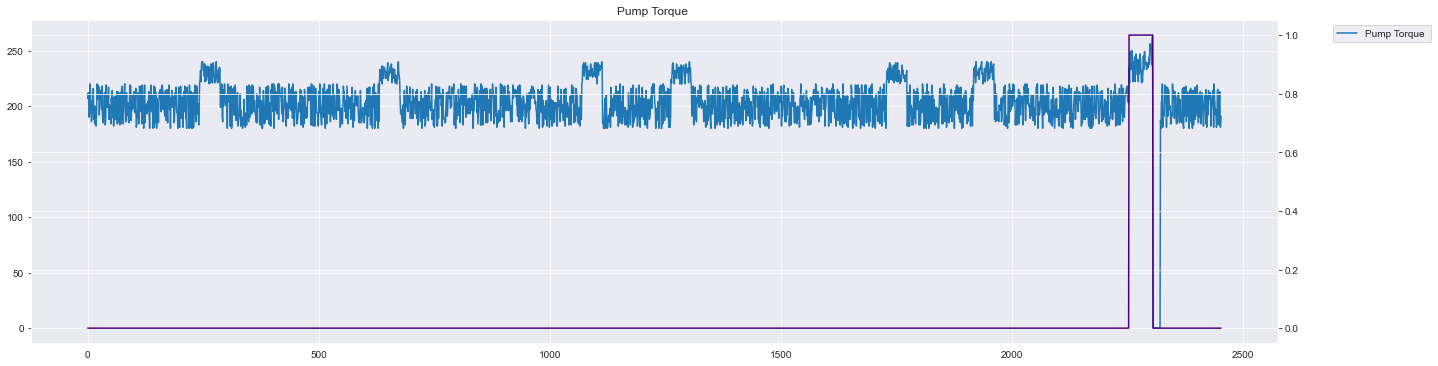

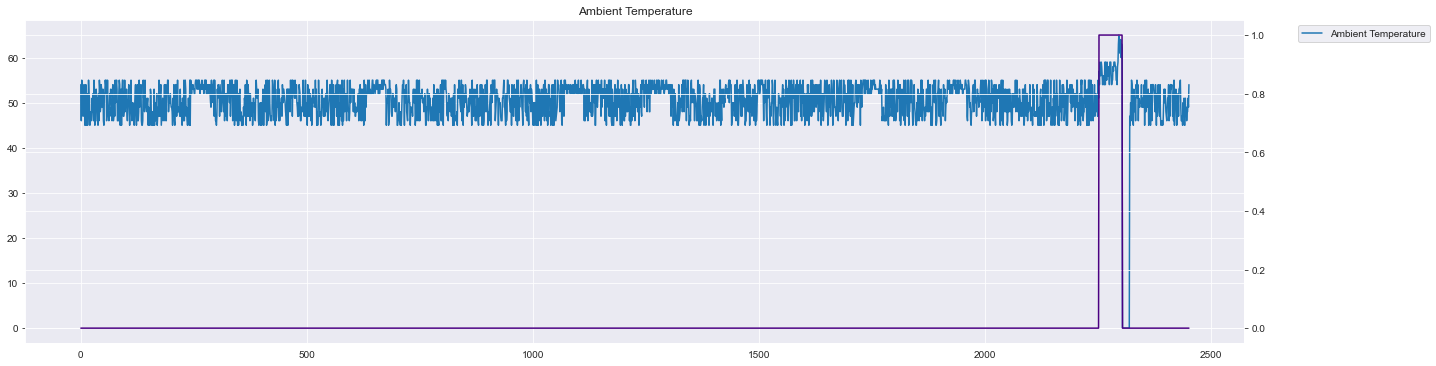

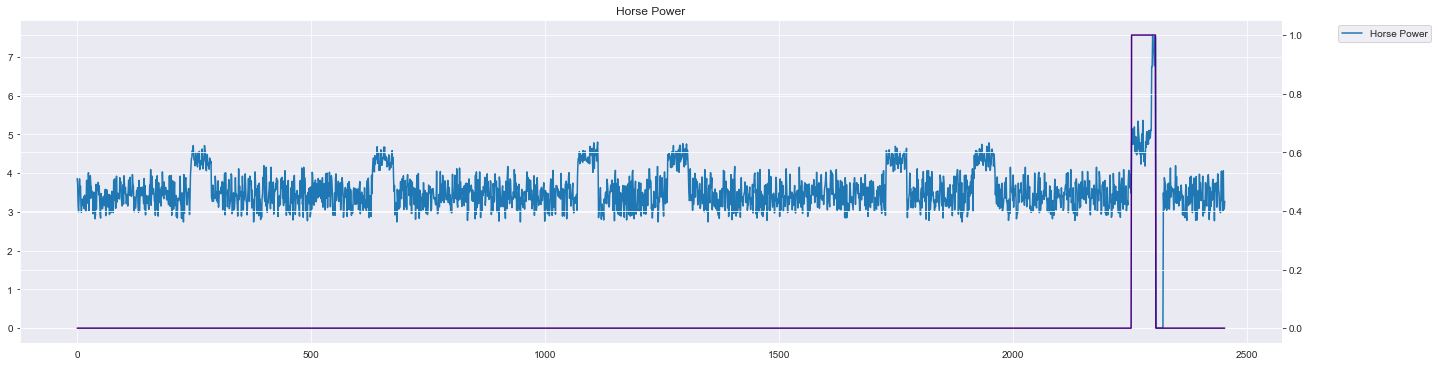

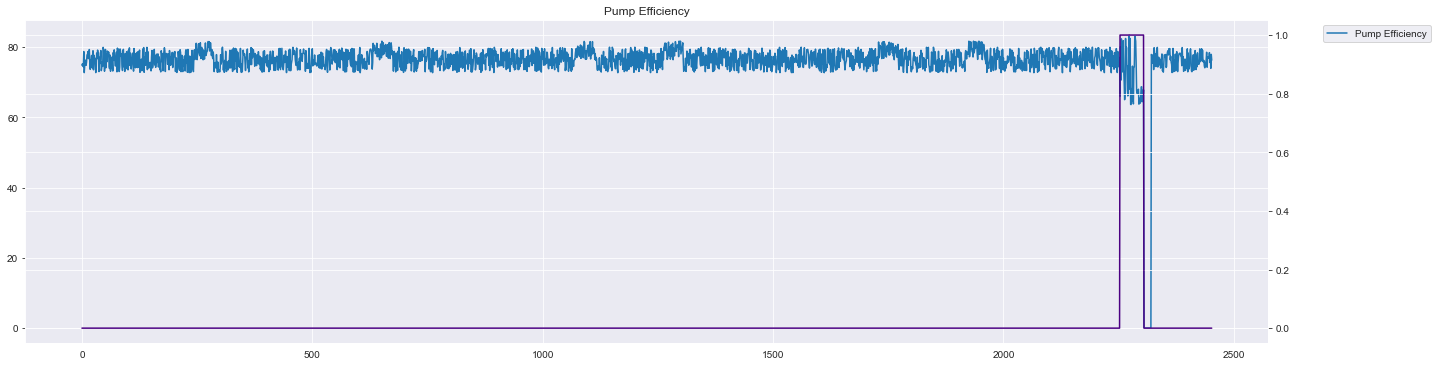

In [ ]:
for i in ListOfVariables:
    failureState = dataframe_raw['PUMP FAILURE (1 or 0)']
    ax = dataframe_raw[i].plot()
    ax2 = ax.twinx()
    ax2.plot(failureState, 'indigo')
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.tight_layout()
    plt.title(i)
    plt.show()

In [ ]:
dataframe_stdev.set_index("TIMEFRAME (DD/MM/YYYY)", inplace=True)
dataframe_time_filtered = dataframe_stdev[(dataframe_stdev.index >= "10/12/2014 10:30")&((dataframe_stdev.index <= "10/12/2014 14:30"))]

In [ ]:
ListOfVariables = dataframe_time_filtered.drop(['PUMP FAILURE (1 or 0)', 'Data Source'], axis=1).columns

In [ ]:
for i in ListOfVariables:
    failureState = dataframe_time_filtered['PUMP FAILURE (1 or 0)']
    ax = dataframe_time_filtered[i].plot()
    ax2 = ax.twinx()
    ax2.plot(failureState, 'indigo')
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.tight_layout()
    plt.title(i)
    plt.show()

In [ ]:
correlated_dataframe = dataframe_raw.corr(method='pearson')
correlated_dataframe

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
Volumetric Flow Meter 1,1.000000,0.893058,0.674691,0.700425,0.713913,0.470081,0.913014,-0.102508
Volumetric Flow Meter 2,0.893058,1.000000,0.671896,0.692183,0.710423,0.462087,0.980144,-0.112115
Pump Speed (RPM),0.674691,0.671896,1.000000,0.711037,0.674645,0.848416,0.677924,0.260016
Pump Torque,0.700425,0.692183,0.711037,1.000000,0.680159,0.847884,0.698527,0.233193
Ambient Temperature,0.713913,0.710423,0.674645,0.680159,1.000000,0.579374,0.712727,0.207946
Horse Power,0.470081,0.462087,0.848416,0.847884,0.579374,1.000000,0.471731,0.421694
Pump Efficiency,0.913014,0.980144,0.677924,0.698527,0.712727,0.471731,1.000000,-0.102696
PUMP FAILURE (1 or 0),-0.102508,-0.112115,0.260016,0.233193,0.207946,0.421694,-0.102696,1.000000


<AxesSubplot:>

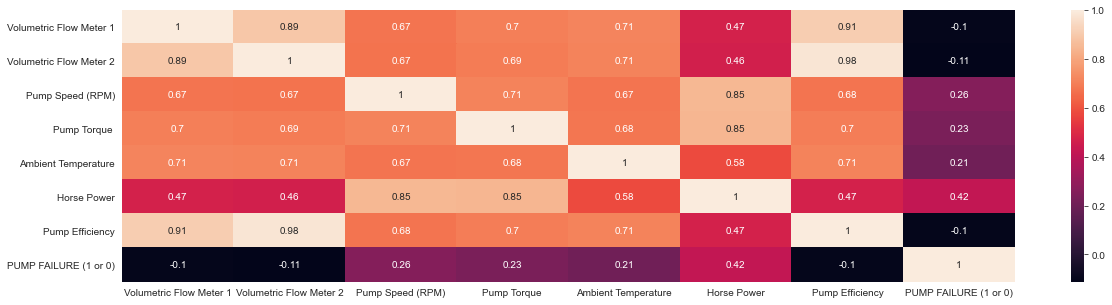

In [ ]:
sns.heatmap(correlated_dataframe, annot=True)

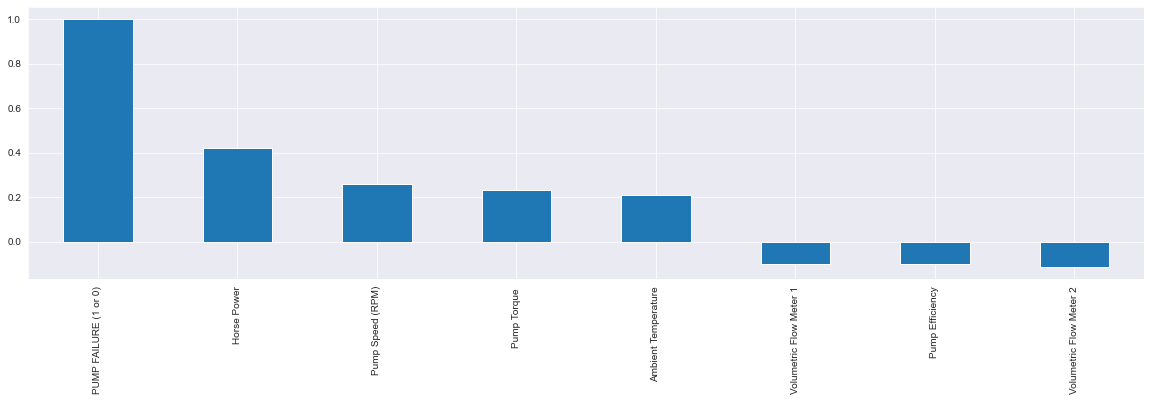

In [ ]:
corrdf=correlated_dataframe.sort_values('PUMP FAILURE (1 or 0)', ascending = False)
corrdf['PUMP FAILURE (1 or 0)'].plot(kind='bar')
plt.show()

<AxesSubplot:>

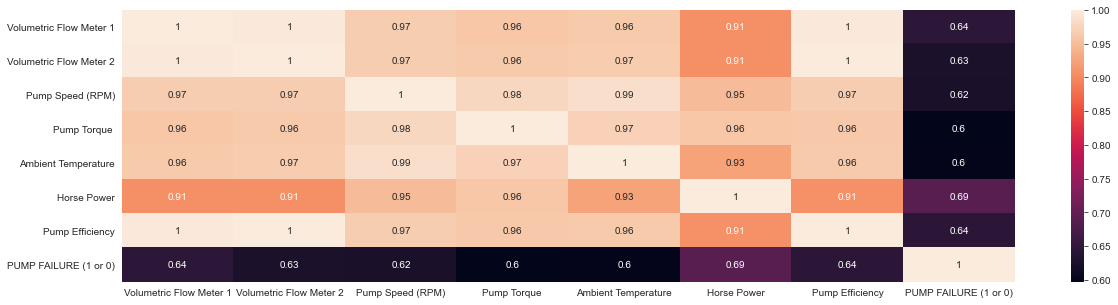

In [ ]:
corr_df = dataframe_stdev.corr(method='pearson')
sns.heatmap(corr_df, annot=True)

In [ ]:
dataframe_raw = pd.read_csv('DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv')

In [ ]:
column1=['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']
column2=['PUMP FAILURE (1 or 0)']
dependent_variables = dataframe_raw[column2]
indpendent_variables = dataframe_raw[column1]
independent_variables = sm.add_constant(dataframe_raw[column1])
regression_model = sm.OLS(dependent_variables, independent_variables).fit()
print(regression_model.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Fri, 29 Oct 2021   Prob (F-statistic):          5.58e-233
Time:                           16:55:44   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [ ]:
column1=['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']
column2=['PUMP FAILURE (1 or 0)']
dependent_variables = dataframe_stdev[column2]
indpendent_variables = dataframe_stdev[column1]
independent_variables = sm.add_constant(dataframe_stdev[column1])
regression_model2 = sm.OLS(dependent_variables, independent_variables).fit()
print(regression_model2.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                           17:17:59   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

<AxesSubplot:>

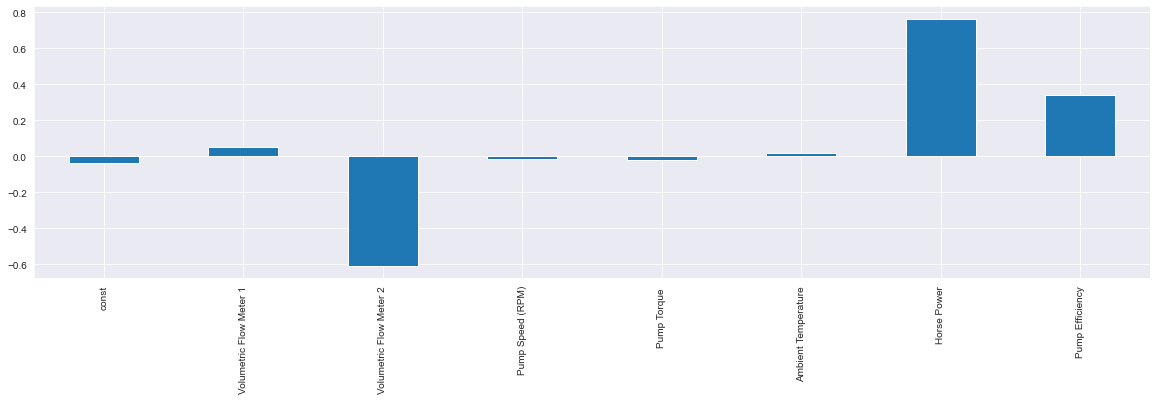

In [ ]:
regression_model2.params.plot(kind='bar')

In [ ]:
dataframe_stdev['Prediction']=regression_model2.predict(independent_variables)
dataframe_stdev

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0),Prediction
0,Rolling Stdev (30 Minute),9/12/2014 0:00,1.04,0.96,5.54,11.70,3.40,0.32,1.74,0,0.012455
1,Rolling Stdev (30 Minute),9/12/2014 0:01,1.06,1.01,5.49,11.73,3.36,0.31,1.83,0,0.005693
2,Rolling Stdev (30 Minute),9/12/2014 0:02,1.06,1.03,5.62,11.94,3.40,0.31,1.87,0,0.001593
3,Rolling Stdev (30 Minute),9/12/2014 0:03,1.06,1.05,5.61,12.10,3.30,0.31,1.90,0,-0.004978
4,Rolling Stdev (30 Minute),9/12/2014 0:04,1.07,1.03,5.61,12.31,3.36,0.30,1.88,0,-0.009635
...,...,...,...,...,...,...,...,...,...,...,...
2447,Rolling Stdev (30 Minute),9/12/2014 0:26,1.36,0.90,4.68,14.10,2.80,0.42,1.63,0,0.063612
2448,Rolling Stdev (30 Minute),9/12/2014 0:27,1.51,0.82,5.15,13.45,2.55,0.43,1.50,0,0.082757
2449,Rolling Stdev (30 Minute),9/12/2014 0:28,1.57,0.93,5.35,14.86,2.65,0.47,1.70,0,0.089230
2450,Rolling Stdev (30 Minute),9/12/2014 0:29,1.76,1.10,0.58,5.51,2.52,0.11,2.00,0,0.081646


<function matplotlib.pyplot.show(close=None, block=None)>

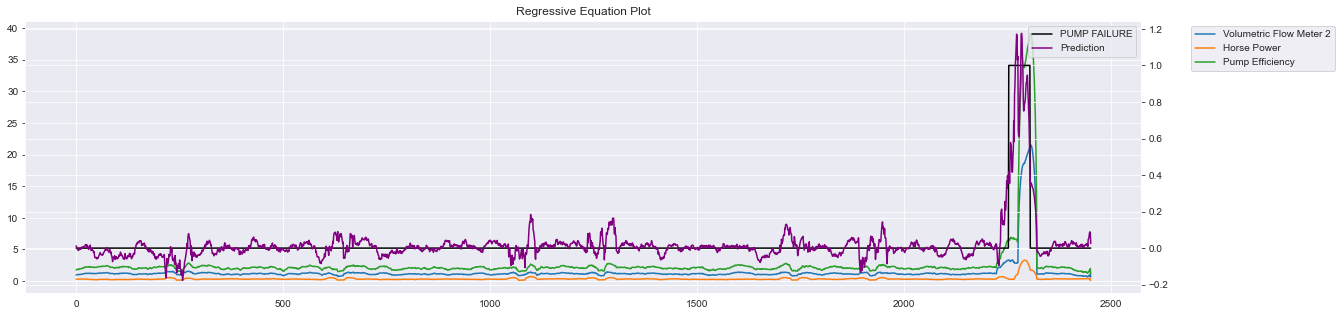

In [ ]:
Axes1 = ['Volumetric Flow Meter 2', 'Horse Power', 'Pump Efficiency']
ax1 = dataframe_stdev[Axes1].plot()
ax2 = ax1.twinx()
ax2.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'], color='black', label = 'PUMP FAILURE')
ax2.plot(dataframe_stdev['Prediction'], color='purple', label = 'Prediction')
ax2.legend()
ax1.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Regressive Equation Plot')
plt.show